In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1) 

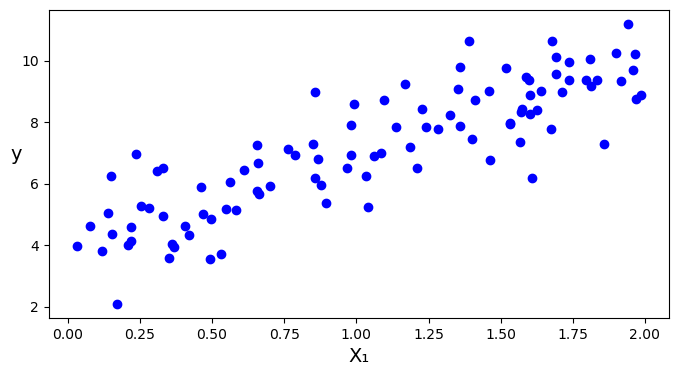

In [60]:
plt.figure(figsize=(8,4))
plt.xlabel('X₁', fontsize=14)
plt.ylabel('y', fontsize=14, rotation='horizontal')

plt.plot(X, y, 'bo')
plt.show()

# Using the normal equation

In [61]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

## We use the function y = 3x + 4 + gaussian noise. The equation finds:

In [62]:
theta_best

array([[4.01374627],
       [2.98786829]])

## we expected $\theta_ 0$ = 4 and $\theta_ 1$ = 3 It came close, but the Gaussian noise made it impossible to recover the exact parameters of the original function

# Now we go do some predicitions with the normal equation

In [83]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [84]:
y_predict = X_new_b.dot(theta_best)

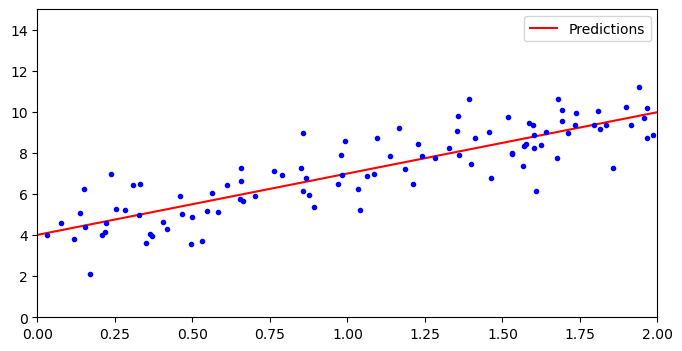

In [85]:
plt.figure(figsize=(8, 4))

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])

plt.legend()
plt.show()

# linear regression with Scikit-Learn

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.01374627]), array([[2.98786829]]))

In [88]:
lin_reg.predict(X_new)

array([[4.01374627],
       [9.98948285]])

# LinearRegression is based in the function scipy.linalg.lstsq() Least squares you can call it directly

In [89]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [90]:
theta_best_svd

array([[4.01374627],
       [2.98786829]])

# You can use np.linalg.pinv() to calculate the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) directly
# :)

In [94]:
np.linalg.pinv(X_b).dot(y)

array([[4.01374627],
       [2.98786829]])